<h3> Desenvolvimento de uma rede neural que maximiza os acertos se uma notícia irá ser popular </h3>
<h5> Alunas: Elaine Sangali, Ana Frozza </h5> <br>

<h3> Introdução </h3>
<p> O presente trabalho tem como objetivo projetar uma rede neural artificial que maximize os acertos de uma base de dados de notícias, onde o objetivo é prever se uma notícia obterá sucesso ou não. Para o desenvolvimento da rede será utilizado o Keras. Será testado vários métodos e valores de entradas para tentar obter o maior número de acerto possível. O conteúdo teórico deste trabalho pode ser encontrado no site do </p> 
[deeplearningbook.com.br](http://deeplearningbook.com.br/capitulos/). 

<h4> Redes neurais</h4>

<p> Uma rede neural tem como objetivo imitar como o cérebro humano aprende. Ela é um mecanismo de aprendizado de máquina muito poderoso, à medida que uma tarefa se torna complicada, há vários perceptrons que formam uma rede que transmitem informações entre si. Um perceptron representa um neurônio. O modelo do Perceptron foi desenvolvido nas décadas de 1950 e 1960 pelo cientista Frank Rosenblatt. Hoje é mais utilizado outros modelos de neurônnios artificias, mas esse seria um modelo básico, como mostra a figura 1, onde o perceptron rece várias entradas, x1; x2; x3 e produz uma única saída binária. </p>

![modelo basico perceptron](https://i0.wp.com/deeplearningbook.com.br/wp-content/uploads/2017/12/perceptron.png?w=280) <center> *figura 1 - Modelo básico de um perceptron* </center>

<p> No modelo da figura 1, o perceptron possui três entradas, x1; x2; x3, para calcular a saída, Rosenblatt introduziu pesos, w1; w2; w3, números reais que representam a importância das entradas para a saída, assim a entrada x1 possui peso w1, x2 peso w2 e x3 peso w3. A saída do neurônio é binária, 0 ou 1, e é determinada pela soma ponderada, Σjwjxj, menor ou maior do que algum valor limiar (threshold), como mostra a figura 2. </p>

![termo algébrico](https://i2.wp.com/deeplearningbook.com.br/wp-content/uploads/2017/12/output.png?w=362) <center> *figura 2 - Modelo algébrico da saída de um perceptron* </center>

<p> O modelo da figura 1 seria um modelo básico de um perceptron, mas atualmente é utilizado modelos mais completos que obtem melhores resultados, como o modelo da figura 3. O modelo da figura 1, simplesmente utiliza uma somatória do produto dos pesos com as entradas, mas esse é um modelo muito simples para determinados problemas. No modelo da figura 3, a função de ativação g(.) usará a saída u em uma função, e o resultado do perceptron será a saída da função g. O simbolo Θ representa o viés (bias), que são utilizados no lugar do threshold, os bias são ajustadas da mesma forma que os pesos sinápticos, o bias permite que um neurônio apresente a saída não nula ainda que todas as suas entradas sejam nulas. O bias representa o quão fácil é fazer o perceptron produzir um 1 (disparar). Um perceptron com um viés muito grande tem uma tendência a emitir um 1, e muito pequeno de emitir 0. </p>

![modelo matemático neuronio](https://i0.wp.com/deeplearningbook.com.br/wp-content/uploads/2018/01/neuronio.jpeg?resize=300%2C137)  <center> *figura 3 - Modelo de perceptron com bia e função de ativação* </center>

<p>O novo modelo utiliza uma função de soma um pouco diferente, ainda é realizado a soma dos produtos dos pesos com as entradas, mas no fim é somado o valor do viés, como mostra a figura 4.</p>

![modelo matemático neuronio](https://i1.wp.com/deeplearningbook.com.br/wp-content/uploads/2017/12/formula.png?w=295)  <center> *figura 4 - Modelo algébrico com o viés* </center>

<p>Um único perceptron não consegue resolver os problemas grandes, para isso é necessário uma rede de perceptrons. Há três categorias de tipos de redes de perceptrons (Arquiteturas):<p>
<ol>
    <li>Redes Neurais Feed-Forward: São mais comuns, a primeira camada é a entrada e a última camada é a saída, se houver uma camada oculta entre as duas, é chamado de redes neurais profundas(Deep Learning). A rede calcula uma série de transformação que altera a semelhança entre os casos, as atividades dos neurônios em cada camada são uma função não-linear das atividades na camada anterior. </li>
    <li>Redes Recorrentes: Essa rede é utilizada quando para se obter o valor de saída atual é necessário analisar o valor do passado. Essa rede é equivalente a redes muito profundas com uma camada oculta por fatia de tempo; exceto que eles usam os mesmos pesos em cada fatia de tempo e recebem entrada em cada fatia. Eles têm a capacidade de lembrar informações em seu estado oculto por um longo período de tempo, mas é muito difícil treiná-las para usar esse potencial. Podem possuir uma dinâmica complicada, sendo difíceis de treinar, mas são mais biologicamente realistas.</li>
    <li>Redes Conectadas Simetricamente: São como as redes recorrentes mas elas possuem o mesmo peso em ambas as direções.  As redes conectadas simetricamente sem unidades ocultas são chamadas de “Redes Hopfield”. As redes conectadas simetricamente com unidades ocultas são chamadas de “Máquinas de Boltzmann”. </li>
</ol>    

O trabalho atual se enquadra na categoria Redes Neurais Feed-Forward, a arquitetura utilizada é a Redes Multilayer Perceptrons (MLP), a rede MLP é composta por mais de um perceptron, e possui uma camada de entrada, uma de saída que toma uma decisão sobre a entrada, e entre as duas pode haver várias camadas ocultas. O MLP é muito utilizado em problemas de aprendizagem supervisionados, ele treina um conjunto de pares entrada-saída e aprende a modelar a correlação entre as entradas e saídas, no treinamento é realizado o ajuste dos parâmetros, pesos e bias da rede para conseguir minimizar o erro.  O backpropagation é usado para fazer os ajustes dos pesos e de bias em relação ao erro, e o próprio erro pode ser medido de várias maneiras, inclusive pelo erro quadrático médio.

<h4> Base de dados: Online News Popularity </h4>

A base de dados [Online News Popularity](http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) possui 60 atributos de várias notícias a ser analisados pela rede neural mais 1 atributo que possui o valor alvo, os atributos possuem o seguinte significado:

<ol>
<li>url: Url da notícia</li>
<li>timedelta: Dias entre a publicação da notícia e a aquisição do conjunto de dados (não-preditiva)</li>
<li>n_tokens_title: Quantidade de palavras do título</li>
<li>n_tokens_content: Quantidade de palavras do conteúdo</li>
<li>n_unique_tokens: Quantidade de palavras únicas no conteúdo</li>
<li>n_non_stop_words: Taxa de palavras sem parar no conteúdo</li>
<li>n_non_stop_unique_tokens: Quantidade de palavras não únicas no conteúdo</li>
<li>num_hrefs: Número de links</li>
<li>num_self_hrefs: Número de links para outras notícias publicados pela Mashable </li>
<li>num_imgs: Número de imagens</li>
<li>num_videos: Número de vídeos </li>
<li>average_token_length: Tamanho médio das palavras no conteúdo</li>
<li>num_keywords: Número de palavras-chave nos metadados</li>
<li>data_channel_is_lifestyle: É o canal de dados 'Lifestyle'?</li>
<li>data_channel_is_entertainment: O canal de dados é 'Entretenimento'?</li>
<li>data_channel_is_bus: É o canal de dados 'Business'?</li>
<li>data_channel_is_socmed: É o canal de dados 'Social Media'?</li>
<li>data_channel_is_tech: O canal de dados é 'Tech'? </li>
<li>data_channel_is_world: é o canal de dados 'World'? </li>
<li>kw_min_min: Pior palavra-chave (min. Compartilhamentos)</li>
<li>kw_max_min: Pior palavra-chave (máx. Compartilhamentos)</li>
<li>kw_avg_min: Pior palavra-chave (média de compartilhamentos)</li>
<li>kw_min_max: Melhor palavra-chave (min. Compartilhamentos)</li>
<li>kw_max_max: Melhor palavra-chave (máx. Compartilhamentos)</li>
<li>kw_avg_max: Melhor palavra-chave (média de compartilhamentos)</li>
<li>kw_min_avg: média palavra-chave (min. partes)</li>
<li>kw_max_avg: média palavra-chave (máx. compartilhamentos)</li>
<li>kw_avg_avg: média palavra-chave (média de compartilhamentos)</li>
<li>self_reference_min_shares: minimo de ações de notícias referenciados em Mashable</li>
<li>self_reference_max_shares: máx. ações de notícias referenciados em Mashable</li>
<li>self_reference_avg_sharess: média. ações de notícias referenciados em Mashable</li>
<li>weekday_is_monday: A notícia foi publicado na segunda-feira?</li>
<li>weekday_is_tuesday: A notícia foi publicado em uma terça-feira?</li>
<li>weekday_is_wednesday: A notícia foi publicado em uma quarta-feira?</li>
<li>weekday_is_thursday: A notícia foi publicado em uma quinta-feira?</li>
<li>weekday_is_friday: A notícia foi publicado em uma sexta-feira?</li>
<li>weekday_is_saturday: A notícia foi publicado em um sábado?</li>
<li>weekday_is_sunday: A notícia foi publicado em um domingo?</li>
<li>is_weekend: A notícia foi publicado no final de semana?</li>
<li>LDA_00: Proximidade do tópico 0 do LDA</li>
<li>LDA_01: Proximidade do tema 1 do LDA</li>
<li>LDA_02: Proximidade do tópico 2 do LDA</li>
<li>LDA_03: Proximidade do tema 3 do LDA</li>
<li>LDA_04: Proximidade do tema 4 do LDA</li>
    
<li>global_subjectivity: Subjetividade do texto</li>
<li>global_sentiment_polarity: polaridade do sentimento de texto</li>
<li>global_rate_positive_words: Taxa de palavras positivas no conteúdo</li>
<li>global_rate_negative_words: Taxa de palavras negativas no conteúdo</li>
<li>rate_positive_words: Taxa de palavras positivas entre tokens não neutros</li>
<li>rate_negative_words: Taxa de palavras negativas entre tokens não neutros</li>
<li>avg_positive_polarity: média polaridade de palavras positivas</li>
<li>min_positive_polarity: min. polaridade de palavras positivas</li>
<li>max_positive_polarity: máx. polaridade de palavras positivas</li>
<li>avg_negative_polarity: média polaridade de palavras negativas</li>
    <li>min_negative_polarity: min. polaridade de palavras negativas</li>
<li>max_negative_polarity: máx. polaridade de palavras negativas</li>
<li>title_subjectivity: subjetividade do título</li>
<li>title_sentiment_polarity: polaridade do título</li>
<li>abs_title_subjectivity: Nível de subjetividade absoluta</li>
<li>abs_title_sentiment_polarity: nível de polaridade absoluta</li>
<li>ações: Número de ações (alvo)</li>
</ol>

Este conjunto de dados resume um conjunto heterogêneo de características sobre artigos publicados pela Mashable em um período de dois anos. O objetivo é prever o número de compartilhamentos nas redes sociais (popularidade). A base de dados contém 39644 exemplos. A média de compartilhamentos é de 3395, assim, valores abaixo dessa média serão considerados não populares, e valores iguais ou acima dessa média serão considerados populares.

<h3> Desenvolvimento </h3>
Inicialmente será importado as bibliotecas que serão utilizadas no projeto, e será utilizado um código simples do keras de classificação binária, pois o resultado é binário, ou é popular, ou não é.


In [9]:
#importando bibliotecas necessárias no projeto
from sklearn import svm
from keras.models import Sequential
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.python.client import device_lib
from sklearn.svm import SVC
from keras import utils as np_utils
import numpy as np
import csv
import matplotlib.pyplot as plt 

In [10]:
reader = csv.reader(open('OnlineNewsPopularity.csv','r'), delimiter=',') #lendo os atributos da base de dados

rows = np.array(list(reader))
labels = rows[0] #vetor com os labels das caracteristicas

X = rows[1:-1, 1:-1] #vetor de caracteristicas
Ya = rows[1:-1, -1] #Vetor de resultados

Y = []

index = 0

for y in Ya:
    if(int(y) >= 3395):
        Y.insert(index, True)        
    else:
        Y.insert(index, False)
    
    index += 1

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #separando em um conjunto de treino e outro de teste

num_input = x_train.shape[1]

Train on 20812 samples, validate on 6938 samples
Epoch 1/50
20812/20812 [==============================] - 36s 2ms/step - loss: 3.3930 - acc: 0.7894 - val_loss: 3.1990 - val_acc: 0.8015
Epoch 2/50
20812/20812 [==============================] - 12s 562us/step - loss: 3.3131 - acc: 0.7944 - val_loss: 3.1990 - val_acc: 0.8015
Epoch 3/50
20812/20812 [==============================] - 12s 562us/step - loss: 3.3131 - acc: 0.7944 - val_loss: 3.1990 - val_acc: 0.8015
Epoch 4/50
20812/20812 [==============================] - 12s 570us/step - loss: 3.3131 - acc: 0.7944 - val_loss: 3.1990 - val_acc: 0.8015
Epoch 5/50
20812/20812 [==============================] - 12s 601us/step - loss: 3.3131 - acc: 0.7944 - val_loss: 3.1990 - val_acc: 0.8015
Epoch 6/50
20812/20812 [==============================] - 13s 624us/step - loss: 3.3131 - acc: 0.7944 - val_loss: 3.1990 - val_acc: 0.8015
Epoch 7/50
20812/20812 [==============================] - 13s 638us/step - loss: 3.3131 - acc: 0.7944 - val_loss: 3.199

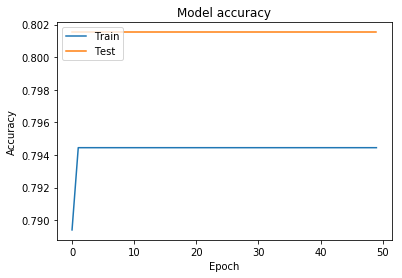

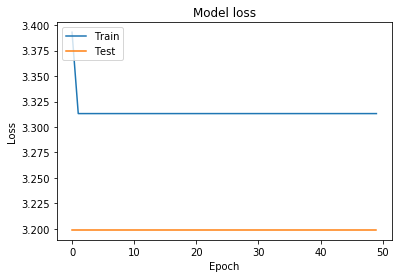

In [11]:
model = Sequential()

model.add(Dense(units=40, activation='relu', input_dim=num_input))
model.add(Dense(units=num_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=16)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
